# Name: Apoorva Sharma
# Topic: Big mart data sales prediction project

# Importing the dataset

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("Bigmart.csv")

# Importing important libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Number of rows and columns

In [6]:
data.shape   #8523 rows and 12 columns

(8523, 12)

In [7]:
data.info() #for observing missing data and type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


categorical data:

1.Item_Identifier 

2.Item_Fat_Content

3.Item_Type

4.Outlet_Identifier  

5.Outlet_Size  

6.Outlet_Location_Type 

7.Outlet_Type    


# checking missing values.

In [8]:
data.isnull().sum()                    #isnull gives TRUE wherever there is a null value and sum will count those number of True.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling missing values

In [ ]:
#mean = average
#mode = most repeated value
#To handle missing values we will replace the non categorical data i.e. Item_Weight by its mean and categorical data by its mode.

In [9]:
data['Item_Weight'].mean()

12.857645184135976

In [9]:
# Now we will fill the missing values of Item_Weight column with its mean.

In [10]:
data['Item_Weight'].fillna(data["Item_Weight"].mean(), inplace= True)   #by using inplace the missing values will be replaced in original dataset

In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

'''Now we will handle Outlet_Size missing values. I have created this osm(Outlet size mode) variable . Making a pivot table 
which compares outletsize and outlet type because they are correlated. wherever there will be grocery store it will replace 
missing value from small and so on as given in the table below.'''



In [11]:
osm = data.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))

In [19]:
print(osm) # here mode of grocery store is small , mode of type 1 is small, mode of type 2 is medium and mode of type3 is medium



Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
missing_values = data['Outlet_Size'].isnull()

In [21]:
print(missing_values)    # True=missing and False= not missing

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [22]:
# Now we will convert all these missing values into there mode value.

In [13]:
data.loc[missing_values, 'Outlet_Size']=data.loc[missing_values, 'Outlet_Type'].apply(lambda x:osm)

In [14]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

In [15]:
# Statistical Measures
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
# numerical features
# sns.set will load seaborn's default theme and color palette to the session
sns.set()

In [17]:
import warnings
warnings.filterwarnings("ignore")

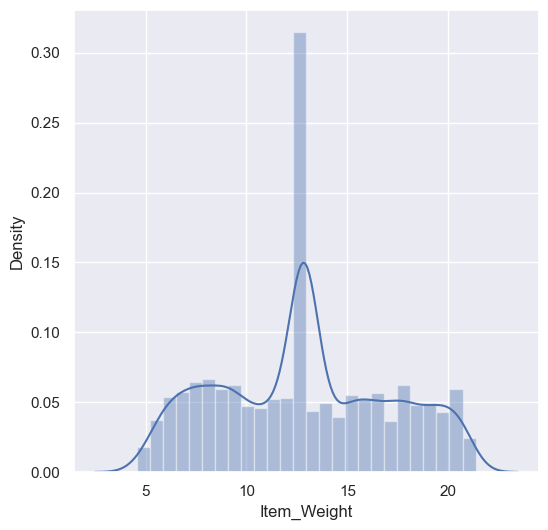

In [28]:
#Item Weight
plt.figure(figsize=(6,6))
sns.distplot(data["Item_Weight"])
plt.show()

In [29]:
# The weights vary from 5 kg to 20 kg . And most of the items weigh 12 kg .

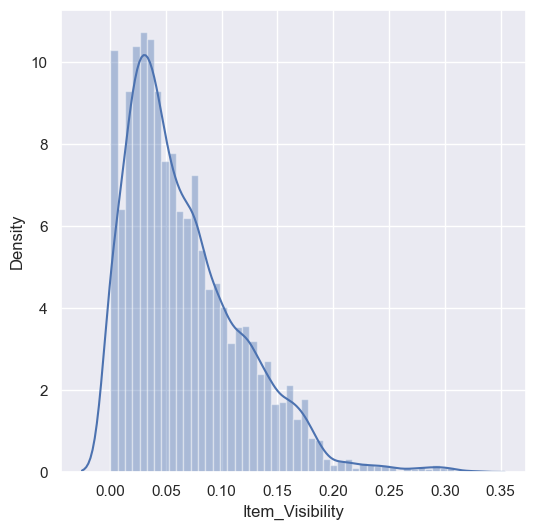

In [18]:
# Item visibility
plt.figure(figsize=(6,6))
sns.distplot(data["Item_Visibility"])
plt.show()

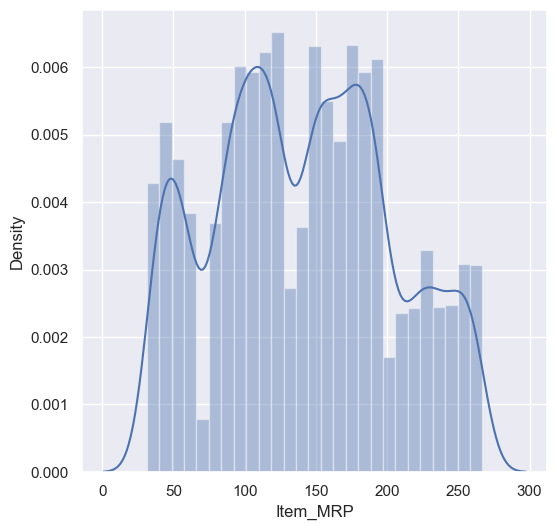

In [19]:
#Item MRP
plt.figure(figsize=(6,6))
sns.distplot(data["Item_MRP"])
plt.show()

In [32]:
# It is not a normal distribution. Most of the products price range from 100 to 180.And less products price ranges above 200.

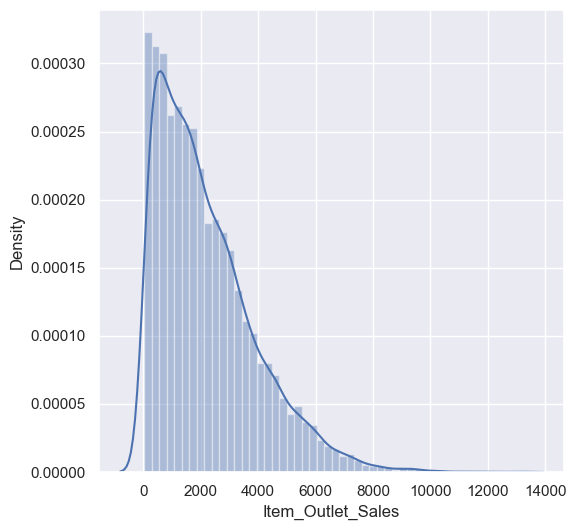

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(data["Item_Outlet_Sales"])
plt.show()

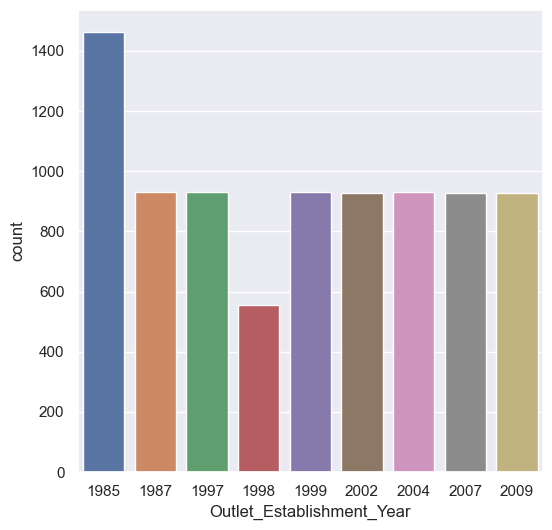

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year",data=data)
plt.show()

In [36]:
# It shows the years in which the stores were established and number of stores too.

# Categorical data

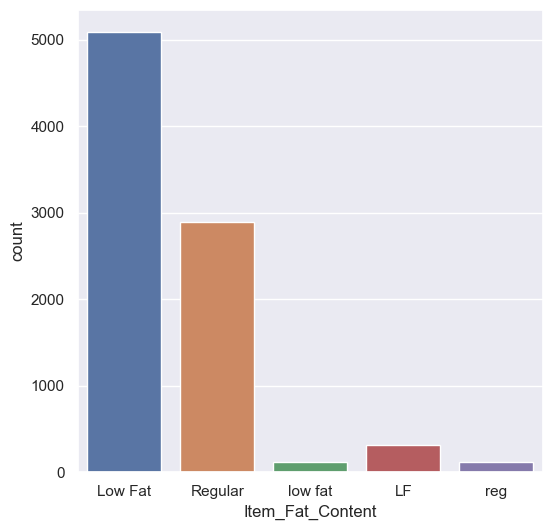

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content",data=data)
plt.show()

In [23]:
# This data is not cleaned we need to process this data. We will add both low fats together and regular also together

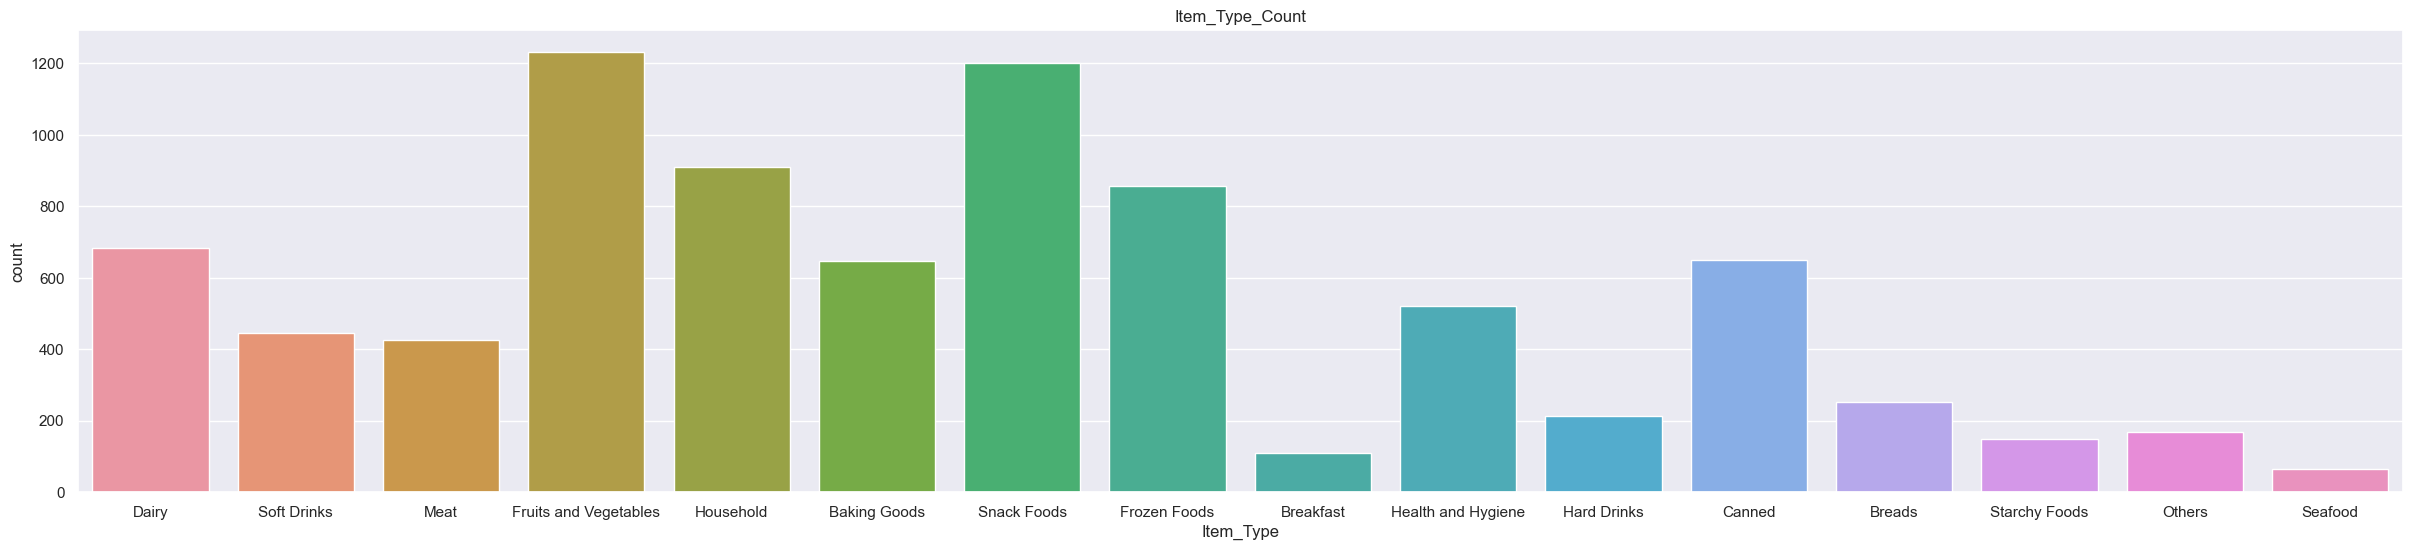

In [29]:
plt.figure(figsize=(30,6))
sns.countplot(x="Item_Type",data=data)
plt.title("Item_Type_Count")
plt.show()

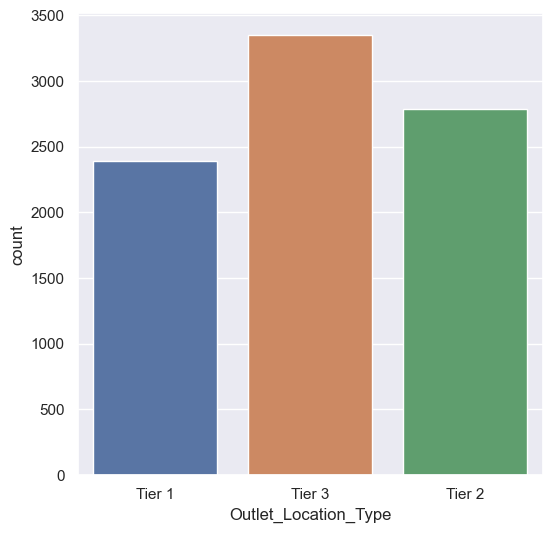

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Location_Type",data=data)
plt.show()

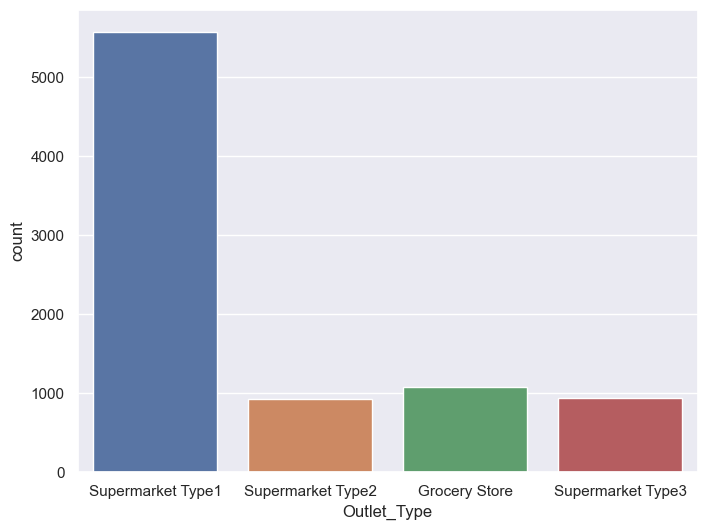

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x="Outlet_Type",data=data)
plt.show()

# Data Pre-Processing

In [37]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
#Now we are processing Item fat content column.

In [39]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [41]:
data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [42]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Label Encoding

In [43]:
# Label encoding means converting string type data into numerical data

In [53]:
data= data.astype({"Outlet_Size": str, "Outlet_Location_Type": str,"Outlet_Type":str })

In [45]:
encoder = LabelEncoder()

In [54]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Type'] = encoder.fit_transform(data['Item_Type'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [55]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting target and training feature data

In [56]:
X = data.drop(columns="Item_Outlet_Sales")   # Here X is feature and Y is target
Y= data["Item_Outlet_Sales"]

In [57]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [58]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


# Splitting the data into Training and testing data

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Training Machine Learning Model

In [62]:
regressor = XGBRegressor() # We are using XGBResgressor model

In [63]:
regressor.fit(X_train, Y_train)  # We are fitting our model in our training data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [64]:
# Now our machine is trained

# Evaluation

In [65]:
# Prediction on training data
# Here we will give our X_train and our trained machine model will predict the Y_train.
training_data_prediction = regressor.predict(X_train)


In [66]:
# R squared Value
# This r2_train will compare the original Y_train value and the predicted Y_train value . This shows us how well our model is working.
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [67]:
print("R Squared value = ", r2_train)

R Squared value =  0.8537744099584121


In [68]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [69]:
r2_test= metrics.r2_score(Y_test, test_data_prediction)

In [70]:
print("R Squared value = ", r2_test)

R Squared value =  0.5163513742508767
